## Functional API

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# 輸入
inputs = keras.Input(shape = (784,))

# 第一層神經：64個神經元
dense = layers.Dense(64, activation = "relu")

# dense(64)<-串接-inputs(784)
x = dense(inputs)

# 第二層神經：64個神經元
x = layers.Dense(64, activation = "relu")(x) # 串接 

# 輸出：10個神經元 == 答案種類 0~9
outputs = layers.Dense(10)(x)

# 解說
# '''             <--          x          <--inputs
# output Dense(10)<--Dense(64)<--Dense(64)<--Input(784)
# '''

In [ ]:
# 檢視套件(框架)方法的參數
help(keras.Model)

In [6]:
# 建置模型
model = keras.Model(inputs = inputs, outputs = outputs, name = "mnist_model")
# 模型參數
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
!pip install pydot

In [10]:
!pip install graphviz

     -------------------------------------- 47.0/47.0 kB 294.4 kB/s eta 0:00:00


In [12]:
# 繪圖
keras.utils.plot_model(model, "my_first_model.png")
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [22]:
# 讀取數據
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


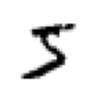

min & max 0..255


In [23]:
# 檢視第一張圖片（經過標準化前）
import matplotlib.pyplot as plt
plt.figure(figsize = (1, 1))
plt.imshow(x_train[0], cmap = 'gray_r')
plt.axis('off')
plt.show()
print('min & max {}..{}'.format(x_train[0].min(), x_train[0].max()))

In [24]:
# 資料標準化
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
print(x_train.shape)

(60000, 784)


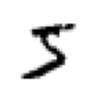

min & max 0.0..1.0


In [25]:
# 檢視第一張圖片（經過標準化後）
import matplotlib.pyplot as plt
plt.figure(figsize = (1, 1))
plt.imshow(x_train[0].reshape(28, 28), cmap = 'gray_r')
plt.axis('off')
plt.show()
print('min & max {}..{}'.format(x_train[0].min(), x_train[0].max()))

In [26]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.RMSprop(),
    metrics = ["accuracy"],
            )
# 開始訓練 & 給數據
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_split = 0.2)
# 模型評估
test_scores = model.evaluate(x_test, y_test, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.3529 - accuracy: 0.8996 - val_loss: 0.1839 - val_accuracy: 0.9477
Epoch 2/10
750/750 [==============================] - 3s 5ms/step - loss: 0.1612 - accuracy: 0.9520 - val_loss: 0.1379 - val_accuracy: 0.9605
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1179 - accuracy: 0.9650 - val_loss: 0.1176 - val_accuracy: 0.9656
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0943 - accuracy: 0.9718 - val_loss: 0.1090 - val_accuracy: 0.9666
Epoch 5/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0788 - accuracy: 0.9766 - val_loss: 0.1134 - val_accuracy: 0.9688
Epoch 6/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0653 - accuracy: 0.9810 - val_loss: 0.1118 - val_accuracy: 0.9710
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0580 - accuracy: 0.9828 - val_loss: 0.1052 - val_accuracy: 0.9713
Epoch 

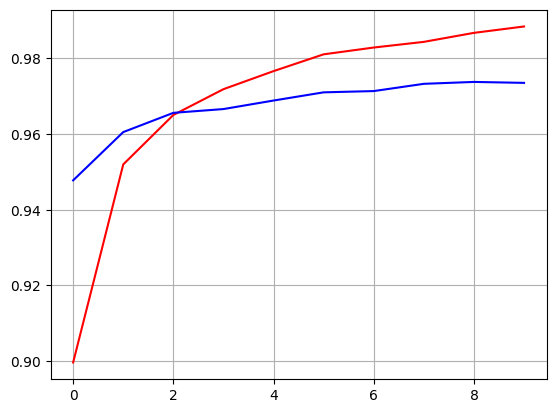

In [27]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

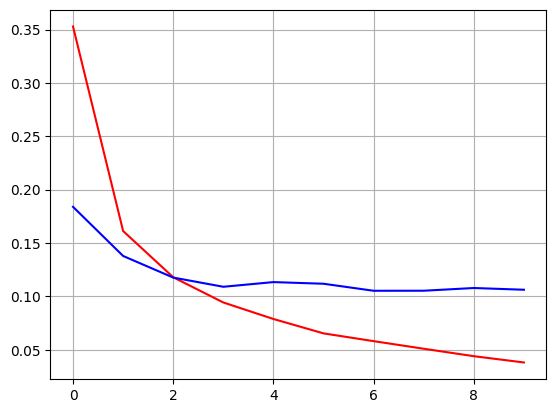

In [28]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

#### 將Optimizer改為“Adam”

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
# 輸入
inputs = keras.Input(shape = (784,))

# 第一層神經：64個神經元
dense = layers.Dense(64, activation = "relu")

# dense(64)<-串接-inputs(784)
x = dense(inputs)

# 第二層神經：64個神經元
x = layers.Dense(64, activation = "relu")(x)

# 輸出：10個神經元 == 答案種類 0~9
outputs = layers.Dense(10)(x)

In [31]:
# 建置模型
model = keras.Model(inputs = inputs, outputs = outputs, name = "mnist_model")
# 模型參數
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 讀取數據
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


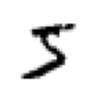

min & max 0..255


In [35]:
# 檢視第一張圖片（經過標準化前）
import matplotlib.pyplot as plt
plt.figure(figsize = (1, 1))
plt.imshow(x_train[0], cmap = 'gray_r')
plt.axis('off')
plt.show()
print('min & max {}..{}'.format(x_train[0].min(), x_train[0].max()))

In [36]:
# 資料標準化
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
print(x_train.shape)

(60000, 784)


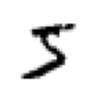

min & max 0.0..1.0


In [37]:
# 檢視第一張圖片（經過標準化後）
import matplotlib.pyplot as plt
plt.figure(figsize = (1, 1))
plt.imshow(x_train[0].reshape(28, 28), cmap = 'gray_r')
plt.axis('off')
plt.show()
print('min & max {}..{}'.format(x_train[0].min(), x_train[0].max()))

In [38]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ["accuracy"],
            )
# 開始訓練 & 給數據
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_split = 0.2)
# 模型評估
test_scores = model.evaluate(x_test, y_test, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.2768 - accuracy: 0.9151 - val_loss: 0.1451 - val_accuracy: 0.9567
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1535 - accuracy: 0.9545 - val_loss: 0.1665 - val_accuracy: 0.9507
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1305 - accuracy: 0.9619 - val_loss: 0.1396 - val_accuracy: 0.9605
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1203 - accuracy: 0.9645 - val_loss: 0.1486 - val_accuracy: 0.9591
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1075 - accuracy: 0.9695 - val_loss: 0.1471 - val_accuracy: 0.9614
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1046 - accuracy: 0.9711 - val_loss: 0.1665 - val_accuracy: 0.9590
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0986 - accuracy: 0.9722 - val_loss: 0.1749 - val_accuracy: 0.9570
Epoch 

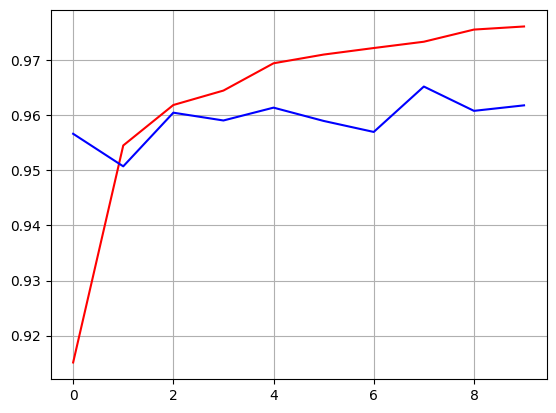

In [39]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

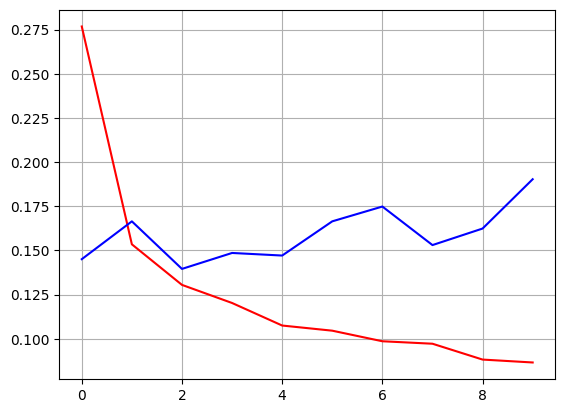

In [40]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

#### Hyper parameter

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [60]:
# 輸入
inputs = keras.Input(shape = (784,))

# 第一層神經：64個神經元
dense = layers.Dense(64, activation = "relu")

# dense(64)<-串接-inputs(784)
x = dense(inputs)

# 第二層神經：64個神經元
x = layers.Dense(64, activation = "relu")(x)

# 輸出：10個神經元 == 答案種類 0~9
outputs = layers.Dense(10, activation = "softmax")(x)

In [61]:
# 建置模型
model = keras.Model(inputs = inputs, outputs = outputs, name = "mnist_model")
# 模型參數
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_18 (Dense)            (None, 64)                50240     
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 讀取數據
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [63]:
# 資料標準化
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
print(x_train.shape)

(60000, 784)


In [64]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = ["accuracy"],
             )
# 開始訓練 & 給數據
history = model.fit(x_train, y_train, batch_size = 800, epochs = 10, validation_split = 0.2)
# 模型評估
test_scores = model.evaluate(x_test, y_test, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/10
60/60 [==============================] - 2s 17ms/step - loss: 1.0364 - accuracy: 0.7196 - val_loss: 0.3540 - val_accuracy: 0.9024
Epoch 2/10
60/60 [==============================] - 1s 13ms/step - loss: 0.3171 - accuracy: 0.9091 - val_loss: 0.2538 - val_accuracy: 0.9286
Epoch 3/10
60/60 [==============================] - 1s 13ms/step - loss: 0.2473 - accuracy: 0.9291 - val_loss: 0.2162 - val_accuracy: 0.9391
Epoch 4/10
60/60 [==============================] - 1s 13ms/step - loss: 0.2069 - accuracy: 0.9409 - val_loss: 0.1879 - val_accuracy: 0.9474
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.1785 - accuracy: 0.9482 - val_loss: 0.1764 - val_accuracy: 0.9500
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.1581 - accuracy: 0.9545 - val_loss: 0.1564 - val_accuracy: 0.9553
Epoch 7/10
60/60 [==============================] - 1s 12ms/step - loss: 0.1408 - accuracy: 0.9595 - val_loss: 0.1478 - val_accuracy: 0.9567
Epoch 8/10
60

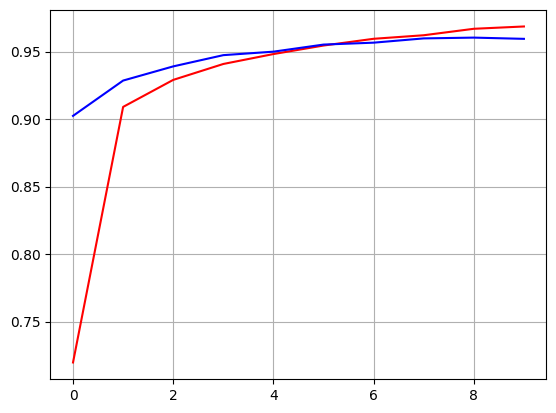

In [65]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

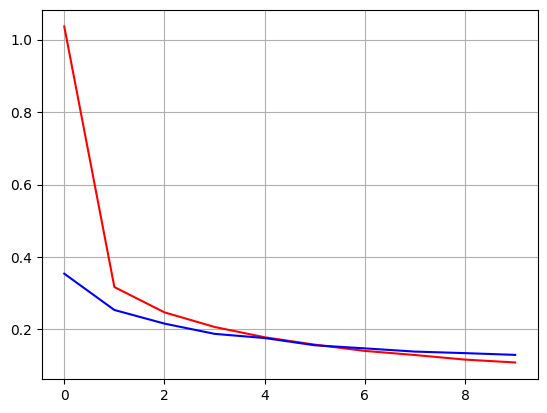

In [66]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

#### Sklearn_digits

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [68]:
# 輸入
inputs = keras.Input(shape = (64,))

# 第一層神經：64個神經元
dense = layers.Dense(64, activation = "relu")

# dense(64) <-串接- inputs(64)
x = dense(inputs)

# 第二層神經：64個神經元
x = layers.Dense(64, activation = "relu")(x) # 串接 

# 輸出：10個神經元
outputs = layers.Dense(10, activation = "softmax")(x)

In [69]:
# 建置模型
model = keras.Model(inputs = inputs, outputs = outputs, name = "mnist_model")
# 模型參數
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


In [70]:
# 讀取數據
# ['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
X, y = digits['data'], digits['target']
# digits['data'].shape
# x_train, x_test, y_train, y_test = X, X, y, y
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

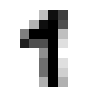

min & max 0.0..16.0


In [73]:
# 檢視第一張圖片（經過標準化前）
import matplotlib.pyplot as plt
plt.figure(figsize = (1, 1))
plt.imshow(x_train[0].reshape(8, 8), cmap = 'gray_r')
plt.axis('off')
plt.show()
print('min & max {}..{}'.format(x_train[0].min(), x_train[0].max()))

In [74]:
# 資料標準化
x_train = x_train.astype("float32") / x_train.max()
x_test = x_test.astype("float32") / x_test.max()
print(x_train.shape)

(1707, 64)


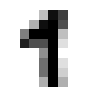

min & max 0.0..1.0


In [75]:
# 檢視第一張圖片（經過標準化後）
import matplotlib.pyplot as plt
plt.figure(figsize = (1, 1))
plt.imshow(x_train[0].reshape(8, 8), cmap = 'gray_r')
plt.axis('off')
plt.show()
print('min & max {}..{}'.format(x_train[0].min(), x_train[0].max()) )

In [76]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = ["accuracy"],
)
# 開始訓練 & 給數據
history = model.fit(x_train, y_train, batch_size = 10, epochs = 10, validation_split = 0.2)
# 模型評估
test_scores = model.evaluate(x_test, y_test, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/10
137/137 [==============================] - 1s 3ms/step - loss: 1.5872 - accuracy: 0.5941 - val_loss: 0.7528 - val_accuracy: 0.8392
Epoch 2/10
137/137 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.9070 - val_loss: 0.3591 - val_accuracy: 0.9123
Epoch 3/10
137/137 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.9414 - val_loss: 0.2515 - val_accuracy: 0.9240
Epoch 4/10
137/137 [==============================] - 0s 3ms/step - loss: 0.1729 - accuracy: 0.9604 - val_loss: 0.1962 - val_accuracy: 0.9386
Epoch 5/10
137/137 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9692 - val_loss: 0.1627 - val_accuracy: 0.9503
Epoch 6/10
137/137 [==============================] - 0s 3ms/step - loss: 0.1066 - accuracy: 0.9802 - val_loss: 0.1612 - val_accuracy: 0.9561
Epoch 7/10
137/137 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.9810 - val_loss: 0.1527 - val_accuracy: 0.9474
Epoch 

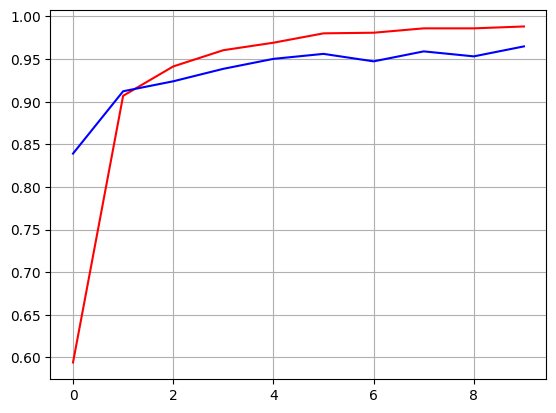

In [77]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

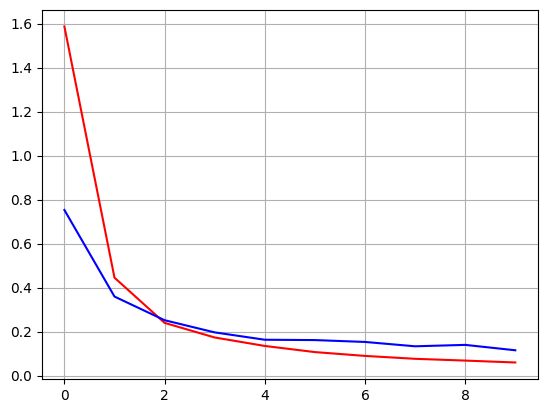

In [78]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

## Quiz
每一個節點均含bias，請問有幾個參數?  
-Input:784  
-First hidden layer  
    Output:400  
-Second hidden layer  
    Output:200  
-Output layer  
    Output:10

In [79]:
(784 * 400 + 400) + (400 * 200 + 200) + (200 * 10 + 10)

396210

In [80]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt
import os
from datetime import datetime

start = datetime.now()

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [81]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer，隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units = 400, input_dim = 784, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 200, kernel_initializer = 'normal', activation = 'relu'))
# Add output layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 編譯：選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 400)               314000    
                                                                 
 dense_25 (Dense)            (None, 200)               80200     
                                                                 
 dense_26 (Dense)            (None, 10)                2010      
                                                                 
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


## Adaline_啟動函數_Activation funtion
#### 未啟動

In [83]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [86]:
X, y = iris.data[:100][:, [0, 1]], np.where(iris.target[:100] > 0, 1, -1)
X[:3], y[:3]

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2]]),
 array([-1, -1, -1]))

In [87]:
from math import floor
import numpy as np
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta                   #權重改變比率
        self.n_iter = n_iter             #經過幾次的計算
        self.random_state = random_state #權重初始化亂數種子

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)                       #初始化權重
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) #初始化權重個數 = w0 + 所有特徵
        self.cost_ = []                                                       #每一round計算的所有成本

        for i in range(self.n_iter):
            net_input = self.net_input(X)                                     # 針對全部的資料進行預測值
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)                          # 經過啟動函數，這邊沒改變
            errors = (y - output)                                        # 真正資料 & 預測的差距
            self.w_[1:] += self.eta * X.T.dot(errors)                    # 產生對應特徵變更的權重 X=100,4, error=100,1
            self.w_[0] += self.eta * errors.sum()                        # 產生w0變更的權重
            cost = (errors ** 2).sum() / 2.0                             # 計算該次(round)的所有資料差距產生成本
            self.cost_.append(cost)                                      # 針對該次產生成本加入變數
            # <--- 最後三次 當連續三次 的訓練成本 到小數點下三位都一樣( 無條件捨去 )
            if len(self.cost_) > 3 and (floor(self.cost_[-3] * 1000) / 1000.0 == 
                                        floor(self.cost_[-2] * 1000) / 1000.0 == 
                                        floor(self.cost_[-1] * 1000) / 1000.0):
                print('Early Stopping', i)
                break

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    # activation sigmoid
    def logistic(self, X):
        return(1 / (1 + np.exp(-1 * X)))
    
    def tanh(self, X):
        return((np.exp(X) - np.exp(-1 * X)) / (np.exp(X) + np.exp(-1 * X)))

    def relu(self, X):
        return(np.where(X <= 0, 0, X))

    def Leakyrelu(self, X):
        return(np.where(X < 0, 0.01 * X, X))
    
    def activation(self, X):
        """Compute linear activation"""
        # return self.logistic(X)
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [88]:
# np.where
import numpy as np
test = np.array([-1, 2, 1, -3, 9])
np.where(test <= 0, 0, test)

array([0, 2, 1, 0, 9])

In [89]:
model = AdalineGD(n_iter = 30, eta = 0.001) # <--改小
model.fit(X, y)

In [90]:
# 如何讓程式碼自動停止，當連續三次的訓練成本到小數點下三位都一樣?
model.cost_[-5:]

[7.28295837973198e+23,
 6.926131949586687e+24,
 6.586788126729736e+25,
 6.264070355895678e+26,
 5.957164048495436e+27]

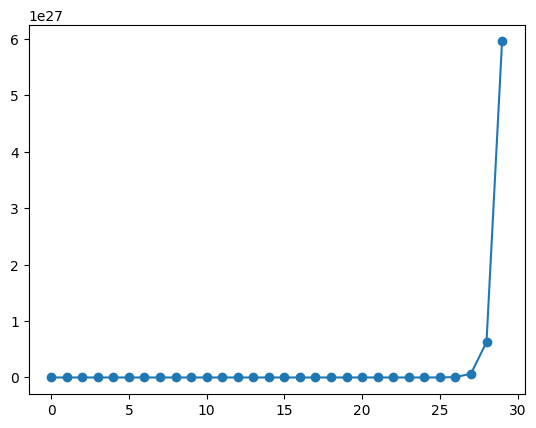

In [91]:
# 畫圖 <--針對 model.cost_取log再畫圖

import matplotlib.pyplot as plt
plt.plot(model.cost_)
plt.scatter(range(len(model.cost_)), model.cost_)
plt.show()

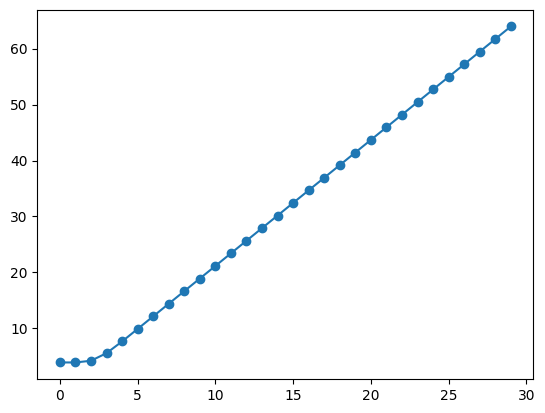

In [92]:
# 畫圖 <--針對 model.cost_取log再畫圖

import matplotlib.pyplot as plt
plt.plot(np.log(model.cost_))
plt.scatter(range(len(model.cost_)), np.log(model.cost_))
plt.show()

#### 啟動

In [101]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [102]:
X, y = iris.data[:100], np.where(iris.target[:100] > 0, 1, -1)
X[:3], y[:3]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]),
 array([-1, -1, -1]))

In [103]:
from math import floor
import numpy as np
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta                   #權重改變比率
        self.n_iter = n_iter             #經過幾次的計算
        self.random_state = random_state #權重初始化亂數種子

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)                       #初始化權重
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) #初始化權重個數 = w0 + 所有特徵
        self.cost_ = []                                                       #每一round計算的所有成本

        for i in range(self.n_iter):
            net_input = self.net_input(X)                                     # 針對全部的資料進行預測值
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)                          # 經過啟動函數，這邊沒改變
            errors = (y - output)                                        # 真正資料 & 預測的差距
            self.w_[1:] += self.eta * X.T.dot(errors)                    # 產生對應特徵變更的權重 X=100,4, error=100,1
            self.w_[0] += self.eta * errors.sum()                        # 產生w0變更的權重
            cost = (errors ** 2).sum() / 2.0                             # 計算該次(round)的所有資料差距產生成本
            self.cost_.append(cost)                                      # 針對該次產生成本加入變數
            # <--- 最後三次 當連續三次 的訓練成本 到小數點下三位都一樣( 無條件捨去 )
            if len(self.cost_) > 3 and (floor(self.cost_[-3] * 1000) / 1000.0 == 
                                        floor(self.cost_[-2] * 1000) / 1000.0 == 
                                        floor(self.cost_[-1] * 1000) / 1000.0):
                print('Early Stopping', i)
                break

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    # activation sigmoid
    def logistic(self, X):
        return(1 / (1 + np.exp(-1 * X)))
    
    def tanh(self, X):
        return((np.exp(X) - np.exp(-1 * X)) / (np.exp(X) + np.exp(-1 * X)))

    def relu(self, X):
        return(np.where(X <= 0, 0, X))

    def Leakyrelu(self, X):
        return(np.where(X < 0, 0.01 * X, X))
    
    def activation(self, X):
        """Compute linear activation"""
        return self.tanh(X)
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [104]:
# np.where
import numpy as np
test = np.array([-1, 2, 1, -3, 9])
np.where(test <= 0, 0, test)

array([0, 2, 1, 0, 9])

In [105]:
model = AdalineGD(n_iter = 30, eta = 0.001)
model.fit(X, y)

In [106]:
# 如何讓程式碼自動停止，當連續三次的訓練成本到小數點下三位都一樣?
model.cost_[-5:]

[0.4098971438038821,
 0.39617105917262024,
 0.3831984027737776,
 0.3709228465328457,
 0.35929332908037637]

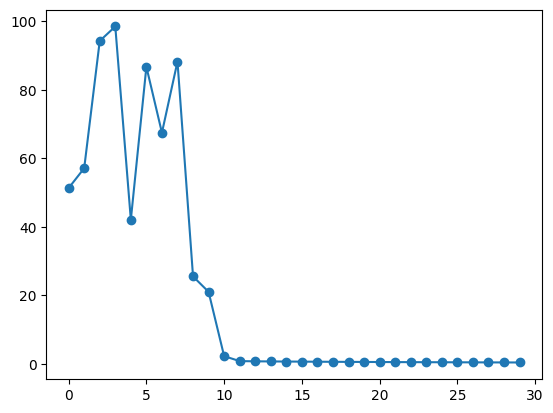

In [107]:
# 畫圖 <--針對 model.cost_取log再畫圖

import matplotlib.pyplot as plt
plt.plot(model.cost_)
plt.scatter(range(len(model.cost_)), model.cost_)
plt.show()

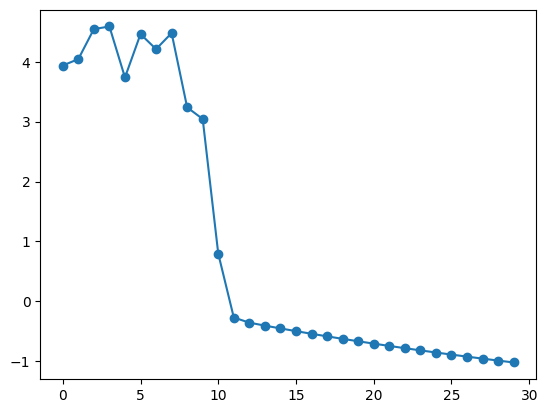

In [108]:
# 畫圖 <--針對 model.cost_取log再畫圖

import matplotlib.pyplot as plt
plt.plot(np.log(model.cost_))
plt.scatter(range(len(model.cost_)), np.log(model.cost_))
plt.show()